<a href="https://colab.research.google.com/github/amiraliamjadi/arima_oil/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse")
install.packages("quantmod")
install.packages("tseries")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [2]:
library(quantmod)
library(tseries)
library(forecast)
library(tidyverse)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
oil_df <- getSymbols('CLN24.NYM', src='yahoo', auto.assign=FALSE)

In [5]:
data_df <- oil_df$CLN24.NYM.Adjusted

In [7]:
sum(is.na(data_df))

[1] 0

In [8]:
data_df <- na.approx(data_df)

In [9]:
sum(is.na(data_df))

[1] 0

In [10]:
head(data_df)

           CLN24.NYM.Adjusted
2018-01-22              53.86
2018-01-23              54.08
2018-01-24              53.54
2018-01-25              53.72
2018-01-26              53.61
2018-01-29              53.24

In [11]:
length(data_df)

[1] 1613

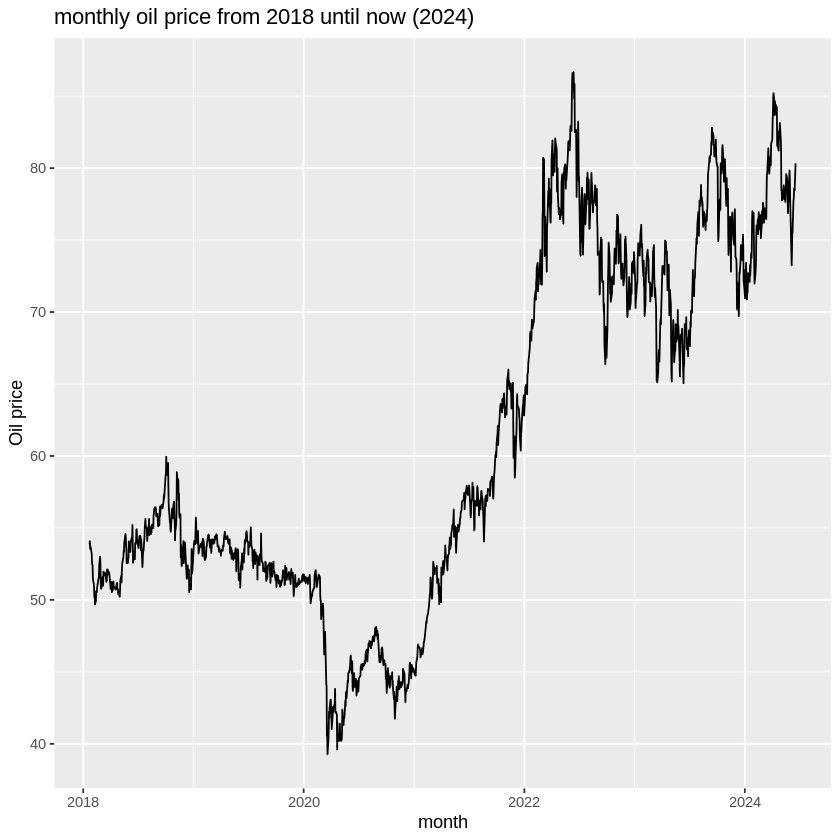

In [12]:
autoplot(data_df) +
  ggtitle("monthly oil price from 2018 until now (2024)") +
  xlab("month") +
  ylab("Oil price")

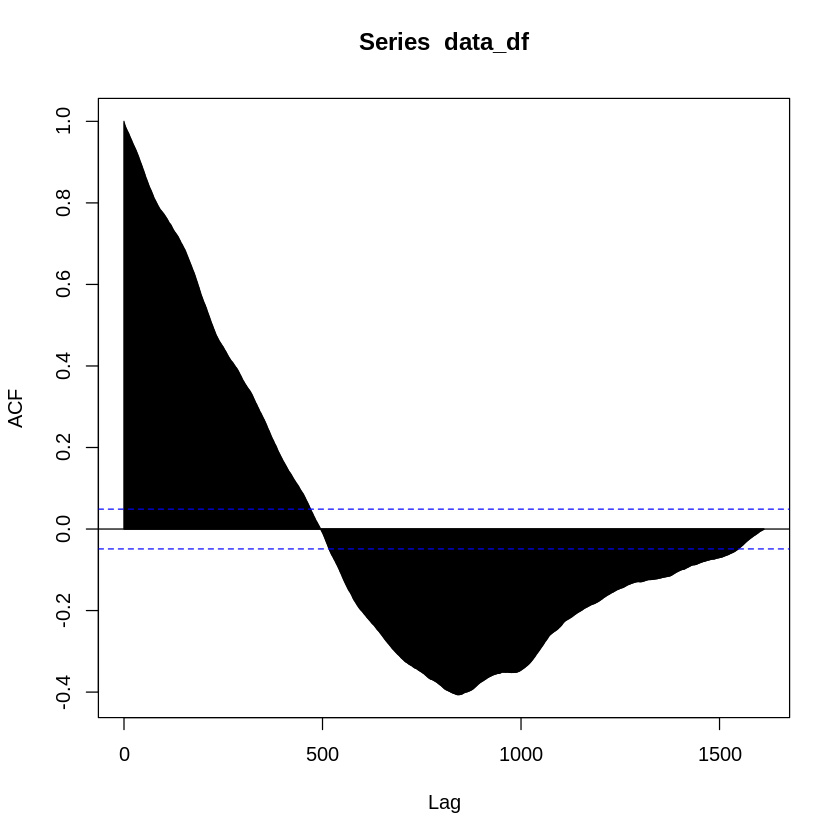

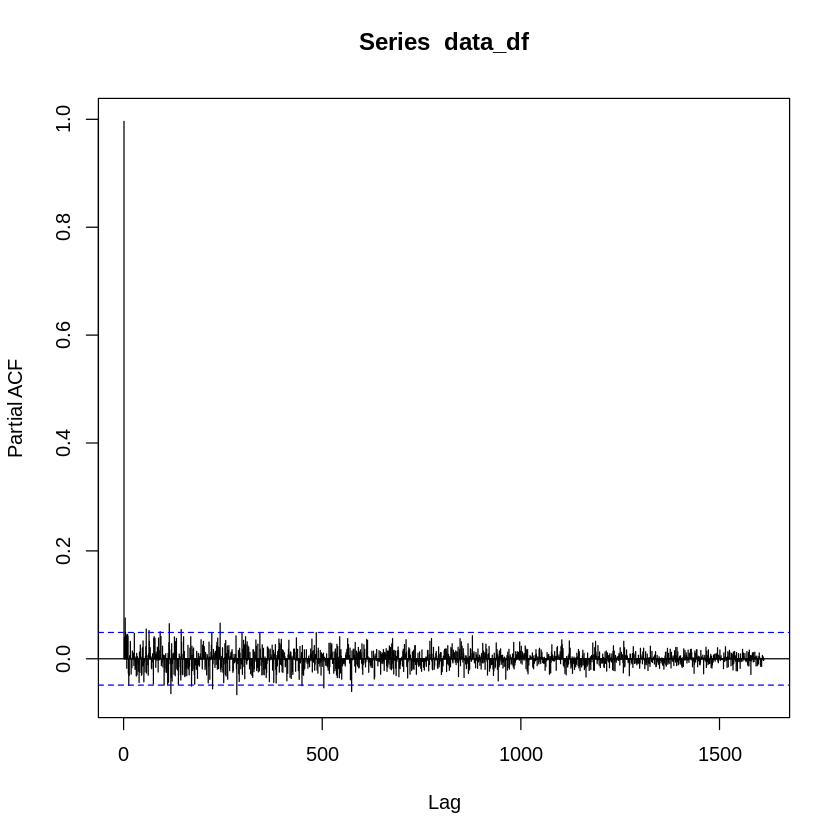

In [13]:
acf(data_df, lag.max = length(data_df))
pacf(data_df, lag.max = length(data_df))

In [14]:
result <- adf.test(data_df)
print(result)

result <- kpss.test(data_df)
print(result)


	Augmented Dickey-Fuller Test

data:  data_df
Dickey-Fuller = -1.8455, Lag order = 11, p-value = 0.6437
alternative hypothesis: stationary



Warning message in kpss.test(data_df):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  data_df
KPSS Level = 12.94, Truncation lag parameter = 8, p-value = 0.01



In [15]:
differenced_ts <- diff(data_df)

In [16]:
differenced_ts <- na.approx(differenced_ts)

In [17]:
head(differenced_ts)

           CLN24.NYM.Adjusted
2018-01-23          0.2200012
2018-01-24         -0.5400009
2018-01-25          0.1800003
2018-01-26         -0.1100006
2018-01-29         -0.3699989
2018-01-30         -0.6200027

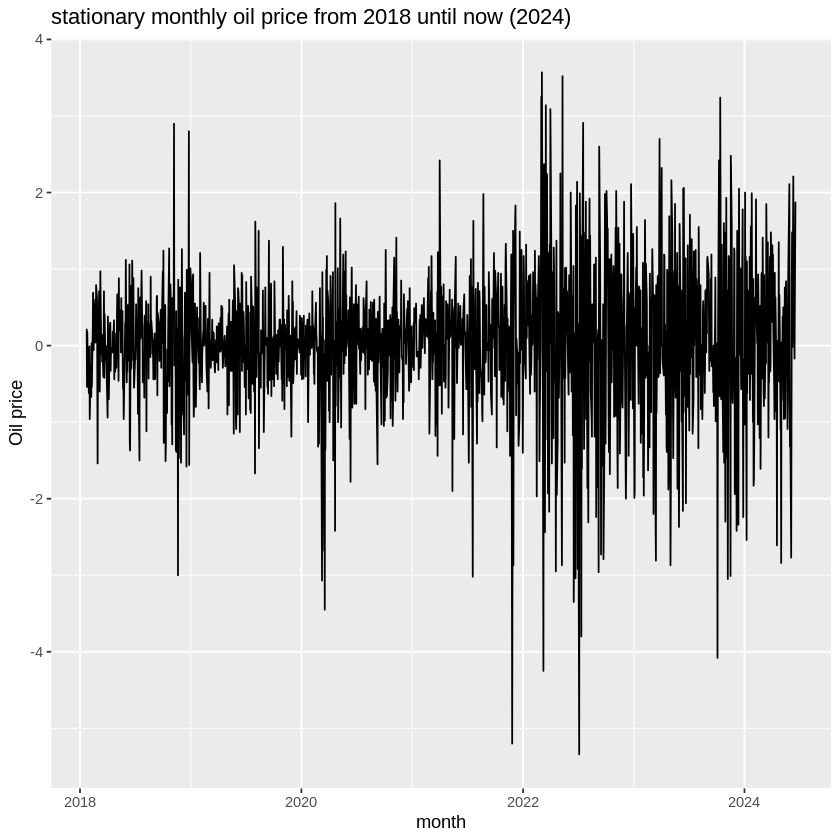

In [18]:
autoplot(differenced_ts) +
  ggtitle("stationary monthly oil price from 2018 until now (2024)") +
  xlab("month") +
  ylab("Oil price")

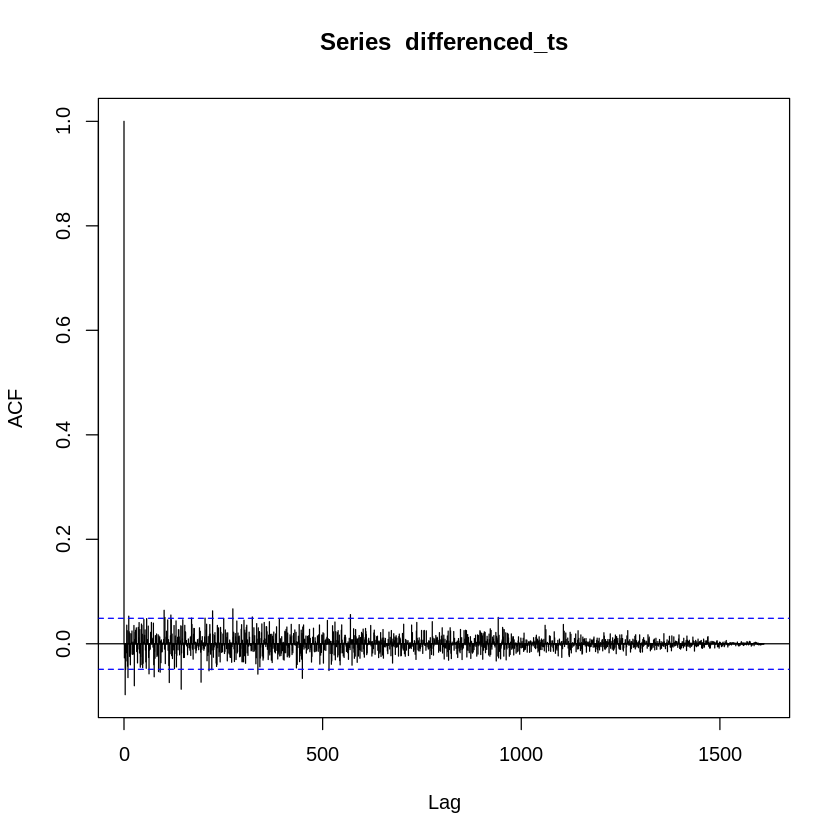

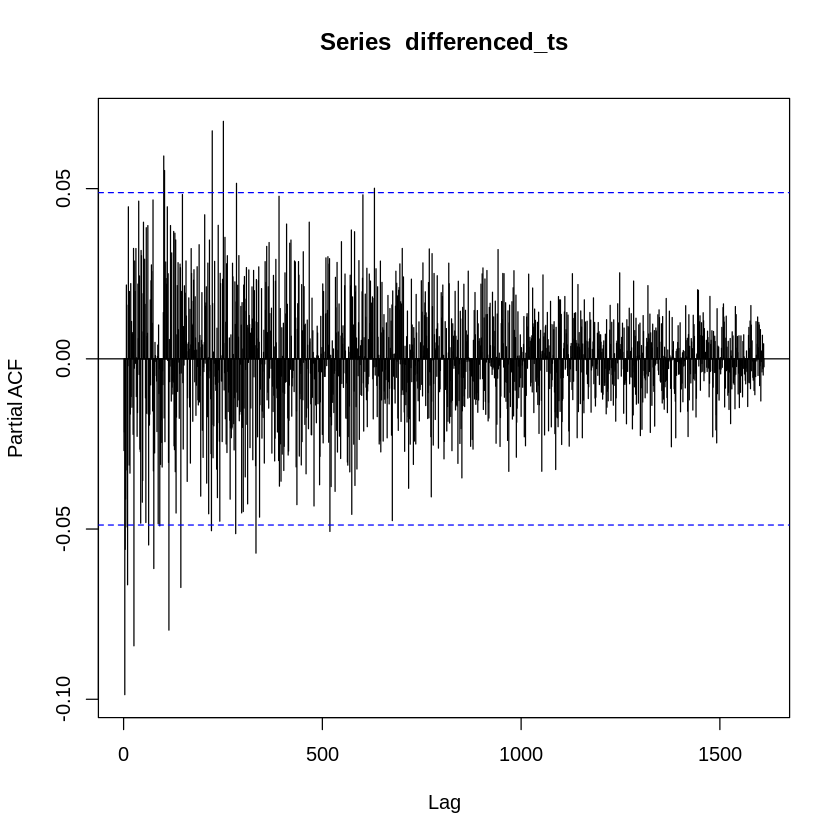

In [19]:
acf(differenced_ts, lag.max = length(differenced_ts))
pacf(differenced_ts, lag.max = length(differenced_ts))

In [20]:
result <- adf.test(differenced_ts)
print(result)

result <- kpss.test(differenced_ts)
print(result)

Warning message in adf.test(differenced_ts):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  differenced_ts
Dickey-Fuller = -12.684, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(differenced_ts):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  differenced_ts
KPSS Level = 0.10215, Truncation lag parameter = 8, p-value = 0.1



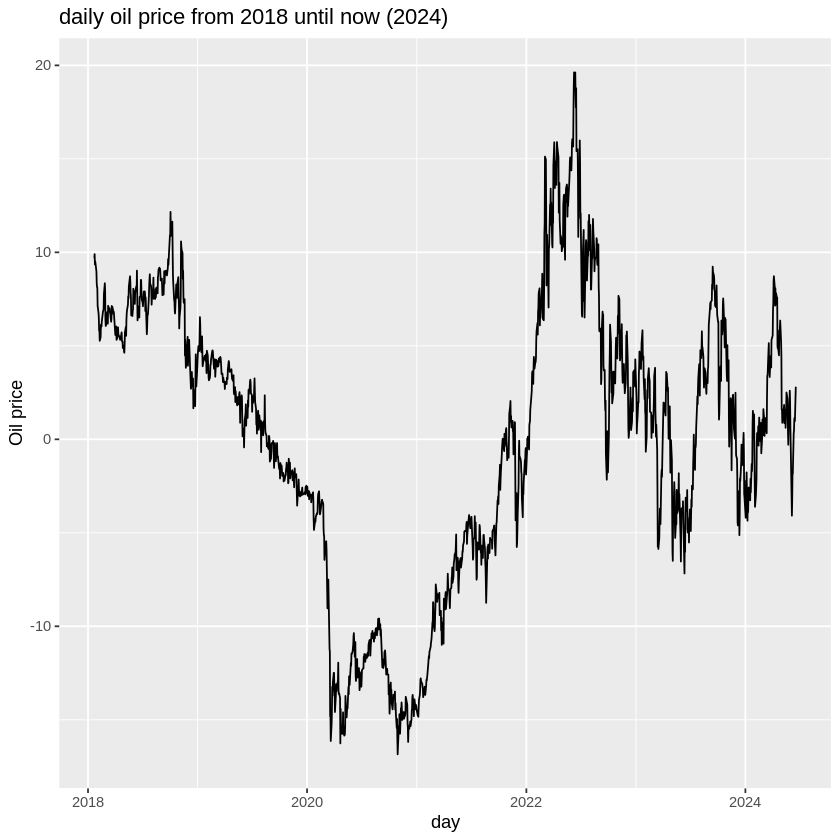

In [21]:
# another method that doesn't go well
m <- lm(coredata(data_df) ~ index(data_df))
detr <- zoo(resid(m), index(data_df))

autoplot(detr) +
  ggtitle("daily oil price from 2018 until now (2024)") +
  xlab("day") +
  ylab("Oil price")

In [22]:
x <- auto.arima(differenced_ts)

In [23]:
x

Series: differenced_ts 
ARIMA(3,0,1) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1
      0.5856  -0.0070  -0.0831  -0.6244
s.e.  0.1442   0.0291   0.0300   0.1440

sigma^2 = 0.8379:  log likelihood = -2142.83
AIC=4295.66   AICc=4295.7   BIC=4322.59

In [24]:
confint(x)

,2.5 %,97.5 %
ar1,0.30296457,0.86815821
ar2,-0.06410844,0.05006796
ar3,-0.14183303,-0.02432672
ma1,-0.90670566,-0.34211275


In [25]:
y <- arima(differenced_ts, order = c(7, 1, 7))

Warning message in arima(differenced_ts, order = c(7, 1, 7)):
“possible convergence problem: optim gave code = 1”


In [26]:
y

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”



Call:
arima(x = differenced_ts, order = c(7, 1, 7))

Coefficients:
          ar1      ar2      ar3     ar4      ar5     ar6     ar7      ma1
      -0.0814  -0.3109  -0.6698  0.1232  -0.1373  0.2548  0.0031  -0.9575
s.e.      NaN      NaN      NaN     NaN      NaN     NaN     NaN      NaN
         ma2     ma3      ma4     ma5      ma6    ma7
      0.2309  0.2809  -0.7744  0.2757  -0.4234  0.368
s.e.     NaN     NaN      NaN     NaN      NaN    NaN

sigma^2 estimated as 0.8279:  log likelihood = -2137.78,  aic = 4305.56

In [27]:
confint(y)

Warning message in sqrt(diag(vcov(object))):
“NaNs produced”


,2.5 %,97.5 %
ar1,NaN,NaN
ar2,NaN,NaN
ar3,NaN,NaN
ar4,NaN,NaN
ar5,NaN,NaN
ar6,NaN,NaN
ar7,NaN,NaN
ma1,NaN,NaN
ma2,NaN,NaN
ma3,NaN,NaN


In [28]:
summary(y)

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”



Call:
arima(x = differenced_ts, order = c(7, 1, 7))

Coefficients:
          ar1      ar2      ar3     ar4      ar5     ar6     ar7      ma1
      -0.0814  -0.3109  -0.6698  0.1232  -0.1373  0.2548  0.0031  -0.9575
s.e.      NaN      NaN      NaN     NaN      NaN     NaN     NaN      NaN
         ma2     ma3      ma4     ma5      ma6    ma7
      0.2309  0.2809  -0.7744  0.2757  -0.4234  0.368
s.e.     NaN     NaN      NaN     NaN      NaN    NaN

sigma^2 estimated as 0.8279:  log likelihood = -2137.78,  aic = 4305.56

Training set error measures:
                    ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set 0.0203593 0.9095922 0.6441603 NaN  Inf 0.6744279 -0.002722335

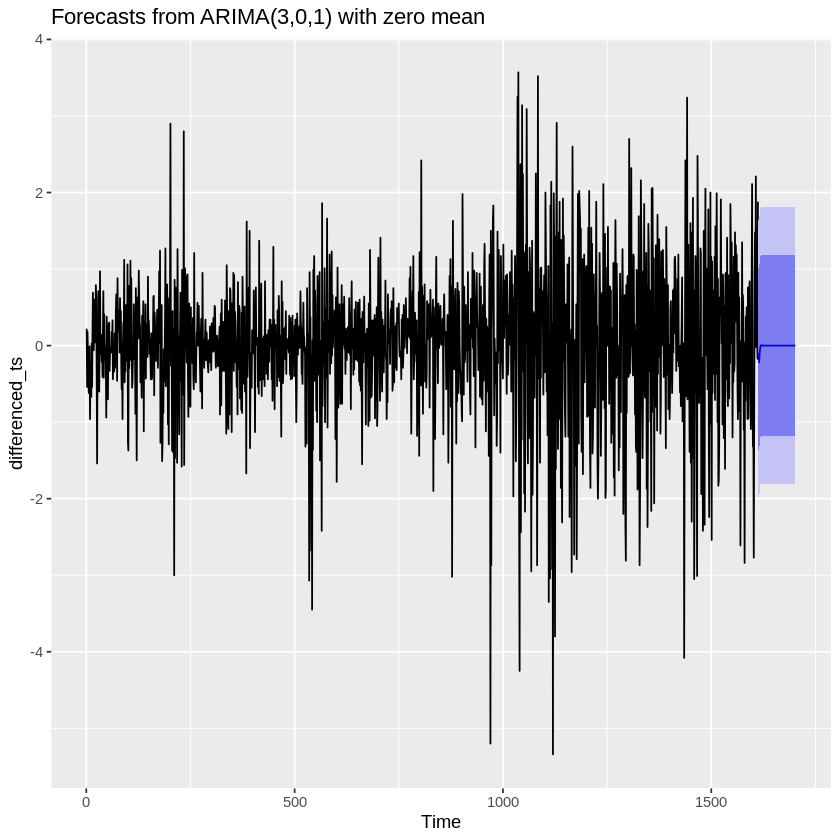

In [33]:
x %>% forecast(h=90) %>% autoplot(include=length(differenced_ts))

In [30]:
forecasts <- forecast(x, h = 90)

Saving 6.67 x 6.67 in image


ERROR: Error in UseMethod("grid.draw"): no applicable method for 'grid.draw' applied to an object of class "forecast"


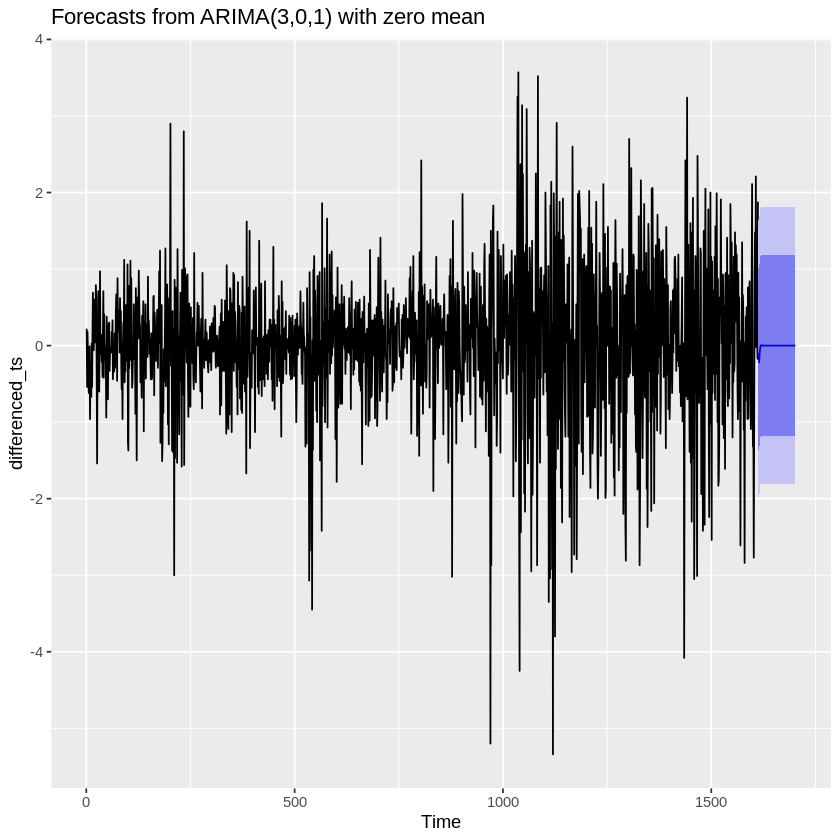

In [32]:
autoplot(forecasts)
ggsave(filename = "scatter_plot.png", plot = forecasts)